# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Lebenszufriedenheit verschiedener Länder
### 1.2 Fragestellung:
- Wie unterscheidet sich die Lebenszufriedenheit zwischen verschiedenen Ländern? 
- Gibt es einen Zusammenhang zwischen dem Einkommen eines Landes und der Lebenszufriedenheit?   
### 1.3 Datenquelle:
- https://ourworldindata.org/grapher/happiness-cantril-ladder?country=OWID_WRL~OWID_EUR~OWID_ASI~OWID_AFR




### 1.4 Daten beschaffen und laden

In [19]:
import pandas as pd

In [20]:
!pip install matplotlib

In [21]:
df = pd.read_csv("happiness-cantril-ladder.csv", skiprows=1,
                 names= ["Entity", "Code", "Year", "Cantril_ladder_score"])
df.head()

,Entity,Code,Year,Cantril_ladder_score
0,Afghanistan,AFG,2011,4.258
1,Afghanistan,AFG,2012,4.040
2,Afghanistan,AFG,2014,3.575
3,Afghanistan,AFG,2015,3.360
4,Afghanistan,AFG,2016,3.794


## 2. Daten vorbereiten 
- Welches Format hat mein Datensatz bzw. wie sind meine Kolumnen strukturiert?
- Welches Format kann ich für welche Teilschritte verwenden (wann soll ich pivot bzw. wide format verwenden)?
- Welche Datentypen kommen in meinem Datensatz vor?

- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Region, die Zeilen sind die verschiedenen Jahre - in absteigender Reihenfolge.

In [22]:
df_pivot = df.pivot(index='Entity', columns='Year', values='Cantril_ladder_score')
df_pivot.head()

Year,2011,2012,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Entity,,,,,,,,,,,,,
Afghanistan,4.258000,4.040000,3.575000,3.360000,3.79400,3.632000,3.203000,2.566900,2.523000,2.404000,1.859000,1.721000,1.36400
Africa,4.453846,4.618466,4.476437,4.397037,4.46021,4.449756,4.517125,4.463035,4.553698,4.519978,4.428142,4.386864,4.39082
Albania,5.134000,5.550000,4.959000,4.655000,4.64400,4.586000,4.719000,4.882700,5.117000,5.199000,5.277000,5.304000,5.41100
Algeria,5.368000,5.422000,5.605000,6.355000,5.87200,5.295000,5.211000,5.005100,4.887000,5.122000,5.329000,5.364000,5.57100
Angola,4.178000,5.589000,4.033000,3.866000,3.79500,3.795000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Statistik der Rohdaten (Analyse im Long-Format)
- Ist meine Variable kontinuierlich oder diskret? Falls diskret, wieviele einzigartige Klassen gibt es? Wieviele Datenpunkte pro Klasse sind vorhanden?
- Anzahl Datenpunkte (Beschreibend und Graphische Darstellung)
    - Wieviele Datenpunkte sind für die bestimmten Variabeln vorhanden?
    - Wo fehlen Datenpunkte?
- Wie ist die Verteilung der zu untersuchenden Variabel(n) (Histogram, Boxplot, Säulendiagram)
- Vermutest du Zusammenhänge zwischen zwei Variabeln (Streuungsdiagramm, Korrelationsmatrix)

*Notiz: Zu jeder Kolumne sollte generell eine Aussage möglich sein.*


- Unsere Variable ist kontinuierlich. 
- Die Daten wurden im Zeitraum 2011 bis 2024 erhoben. 
- Die Lebenszufriedenheit liegt zwischen 1.364 und 7.856. 
- Es sind 178 Gebiete, 169 Codes und 13 Jahre. 
- Die Daten sind nicht komplett. Gewisse Gebiete haben keine Daten.
- Insgesamt wurden während 13 Jahren 2112 Daten erhoben. 
- Die Länder mit den wenigsten Daten ist Guyana und Cuba.
- Die Länder ohne Daten sind ... 

In [23]:
df.dtypes

Entity                   object
Code                     object
Year                      int64
Cantril_ladder_score    float64
dtype: object

In [24]:
df["Year"].describe()

count    2112.000000
mean     2017.723011
std         3.965923
min      2011.000000
25%      2015.000000
50%      2018.000000
75%      2021.000000
max      2024.000000
Name: Year, dtype: float64

In [25]:
df["Cantril_ladder_score"].describe()

count    2112.000000
mean        5.462898
std         1.115251
min         1.364000
25%         4.601250
50%         5.457100
75%         6.322500
max         7.856000
Name: Cantril_ladder_score, dtype: float64

In [26]:
df["Entity"].describe()

count            2112
unique            178
top       Afghanistan
freq               13
Name: Entity, dtype: object

In [27]:
print('Anzahl verschiedener Gebiete: ', len(df['Entity'].unique()))

Anzahl verschiedener Gebiete:  178


In [28]:
df['Entity'].value_counts()

Entity
Afghanistan    13
Niger          13
Montenegro     13
Morocco        13
Myanmar        13
               ..
Oman            3
Puerto Rico     2
Maldives        2
Guyana          1
Cuba            1
Name: count, Length: 178, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

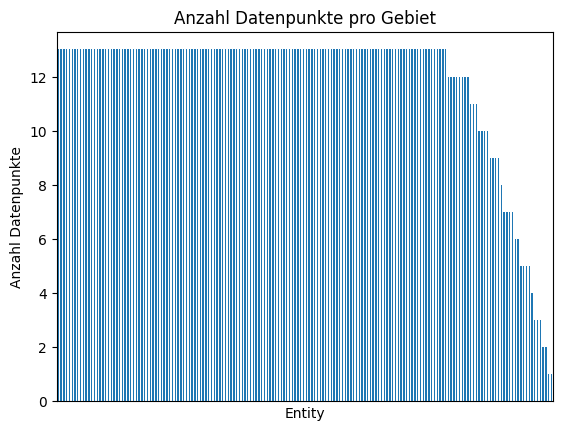

In [29]:
df['Entity'].value_counts().plot(kind='bar', 
                                 xticks=[],    
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

In [30]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  169


In [31]:
df['Code'].value_counts()

Code
AFG    13
PHL    13
MNE    13
MAR    13
MMR    13
       ..
OMN     3
MDV     2
PRI     2
GUY     1
CUB     1
Name: count, Length: 168, dtype: int64

In [46]:
df['Entity'].value_counts()

Entity
Afghanistan    13
Niger          13
Montenegro     13
Morocco        13
Myanmar        13
               ..
Oman            3
Puerto Rico     2
Maldives        2
Guyana          1
Cuba            1
Name: count, Length: 178, dtype: int64

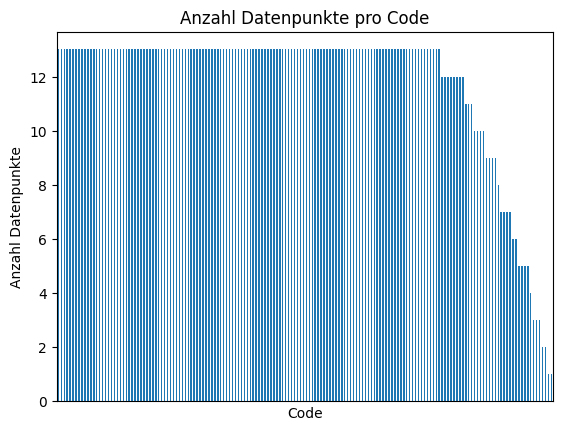

In [32]:
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

In [33]:
df['Year'].value_counts().sort_index()

Year
2011    167
2012    167
2014    169
2015    168
2016    166
2017    167
2018    167
2019    164
2020    160
2021    157
2022    148
2023    154
2024    158
Name: count, dtype: int64

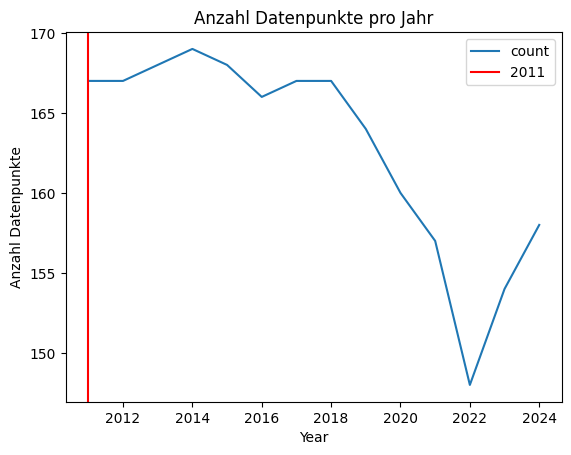

In [40]:
g = df['Year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=2011, color='red',label='2011') 
g.legend()

In [35]:
df.describe()

,Year,Cantril_ladder_score
count,2112.000000,2112.000000
mean,2017.723011,5.462898
std,3.965923,1.115251
min,2011.000000,1.364000
25%,2015.000000,4.601250
50%,2018.000000,5.457100
75%,2021.000000,6.322500
max,2024.000000,7.856000


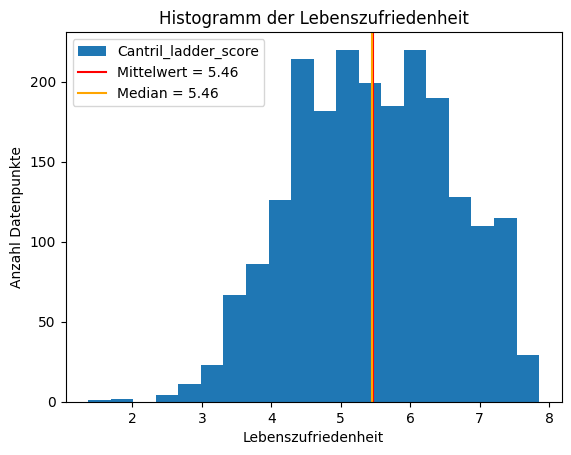

In [43]:
g = df['Cantril_ladder_score'].plot(kind='hist', bins=20, title='Histogramm der Lebenszufriedenheit', 
                           xlabel='Lebenszufriedenheit', ylabel='Anzahl Datenpunkte')
mean = df['Cantril_ladder_score'].mean()
g.axvline(x=df['Cantril_ladder_score'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df['Cantril_ladder_score'].median()
g.axvline(x=df['Cantril_ladder_score'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

